In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris() # アヤメのデータの読み込み
data = iris.data.astype(np.float32)
X = data[:, :3] # アヤメの計測データのうち、最初の３つを説明変数とします。
Y = data[:, 3].reshape(len(data), 1) # 最後の１つを目的変数とします。

# 奇数番目のデータを教師データ、偶数番目のデータをテストデータとします。
index = np.arange(Y.size)
X_train = X[index[index % 2 != 0], :] # 説明変数（教師データ）
X_test = X[index[index % 2 == 0], :] # 説明変数（テストデータ）
Y_train = Y[index[index % 2 != 0], :] # 目的変数（教師データ）
Y_test = Y[index[index % 2 == 0], :] # 目的変数（テストデータ）

import torch
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
Y_train = torch.from_numpy(Y_train).float()
Y_test = torch.from_numpy(Y_test).float()

from torch.utils.data import TensorDataset
train = TensorDataset(X_train, Y_train)

from torch.utils.data import DataLoader
train_loader = DataLoader(train, batch_size=10, shuffle=True)

In [2]:
#import torch.nn.functional as F
class MLPR(torch.nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(MLPR, self).__init__()
        self.l1 = torch.nn.Linear(n_input, n_hidden)
        self.l2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        h1 = self.l1(x)
        h2 = torch.sigmoid(h1)
        h3 = self.l2(h2)
        return h3

In [3]:
model = MLPR(3, 3, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

from torch.autograd import Variable
loss_history = []
for epoch in range(5000):
    total_loss = 0
    for x_train, y_train in train_loader:
        x_train = Variable(x_train)
        y_train = Variable(y_train)
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_history.append(total_loss)
    if (epoch +1) % 500 == 0:
        print(epoch + 1, total_loss)

500 0.35676868446171284
1000 0.3428170122206211
1500 0.32356187514960766
2000 0.32285130210220814
2500 0.29634756315499544
3000 0.31214264407753944
3500 0.3139023622497916
4000 0.281060092151165
4500 0.29719276959076524
5000 0.28280818928033113


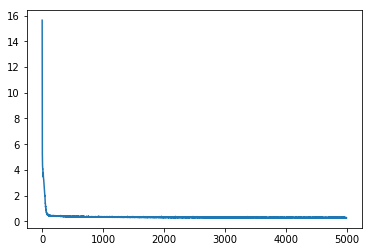

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history)

No handles with labels found to put in legend.


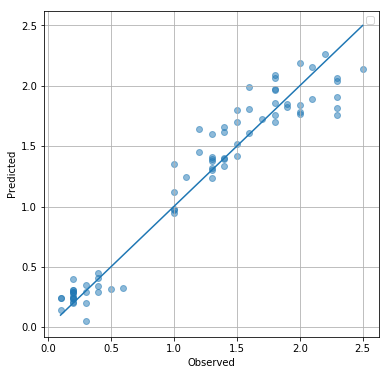

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(Y_train.flatten(), model.forward(X_train).data.flatten(), alpha=0.5)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)])
plt.grid()
plt.legend()
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()